# Using the AnalyzeL1 Class
This notebook demonstrates how to use some of the methods in the AnalyzeL1 class.  First, import packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from modules.calibration_lookup.src.alg import GetCalibrations
from modules.Utils.kpf_parse import get_datetime_obsid, get_filename, get_kpf_data
from datetime import datetime
from kpfpipe.models.level1 import KPF1
from modules.quicklook.src.analyze_l1 import AnalyzeL1
%matplotlib inline

Next read the L1 files.

In [2]:
ObsID      = 'KP.20250202.67478.44' # LFC - evening
ObsID_ref1 = 'KP.20250202.12675.61' # LFC - morning
ObsID_ref2 = 'KP.20250110.12207.16' # LFC - a month previous
L1 = get_kpf_data(ObsID, 'L1')

Then make an L1 object and compute the difference with a reference L1 using the `compare_wave_to_reference()` method, whose docstring is also shown

In [3]:
myL1 = AnalyzeL1(L1)
myL1.compare_wave_to_reference()
myL1.compare_wave_to_reference.__doc__
help(myL1.compare_wave_to_reference)

Help on method compare_wave_to_reference in module modules.quicklook.src.analyze_l1:

compare_wave_to_reference(reference_file='auto') method of modules.quicklook.src.analyze_l1.AnalyzeL1 instance
    This method compares the WAVE arrays of the L1 object to a WAVE arrays
    of a reference L1.  The comparisons are: 1) the median difference in 
    wavelength or pixels between L1 and L1_ref per order and per orderlet, 
    2) the stddev of the difference in wavelength and pixel, 3) 
    the difference evaluate and the first, middle, or last pixel.
    The reference can be from a file whose name is given or is automatically 
    set using GetCalibrations.  The method does note return anything, but it 
    sets a set of attributes (below).
    
    Arguments:
        reference_file - filename of reference wavelength solution
                         for default value of "auto", the reference is 
                         equal to the rough_wls from GetCalibrations
    
    Attributes set:


So, if one wanted to retrieve the median difference in wavelength (Ang) for SCI2 in order 10 on the green CCD, the command is:

In [4]:
print(myL1.wave_median_green[10,1])

1.9166500196400469


And, the standard deviation of the difference in WAVE arrays (converted from Angstroms to pixels) in the CAL fiber for order 12 on the red CCD is:

In [5]:
print(myL1.wave_stddev_red[12,4])

-0.22259370362308525


One can also make plots of these comparisons.  In the two examples below, the 5x5 grid is over orderlets vertically (SCI1, SCI2, SCI3, SKY, CAL) and comparison type horizontally (median(diff), stddev(diff), diff at pixel=0, diff at pixel=2040, diff at pixel=4079).  The first example, the difference is between evening and morning L1 files.  In the second example, the differce is between L1 files for exposurs separated by about a week.  The example also shows how the top 3 outliers per panel are noted (if they are >4-sigma outliers in that panel).

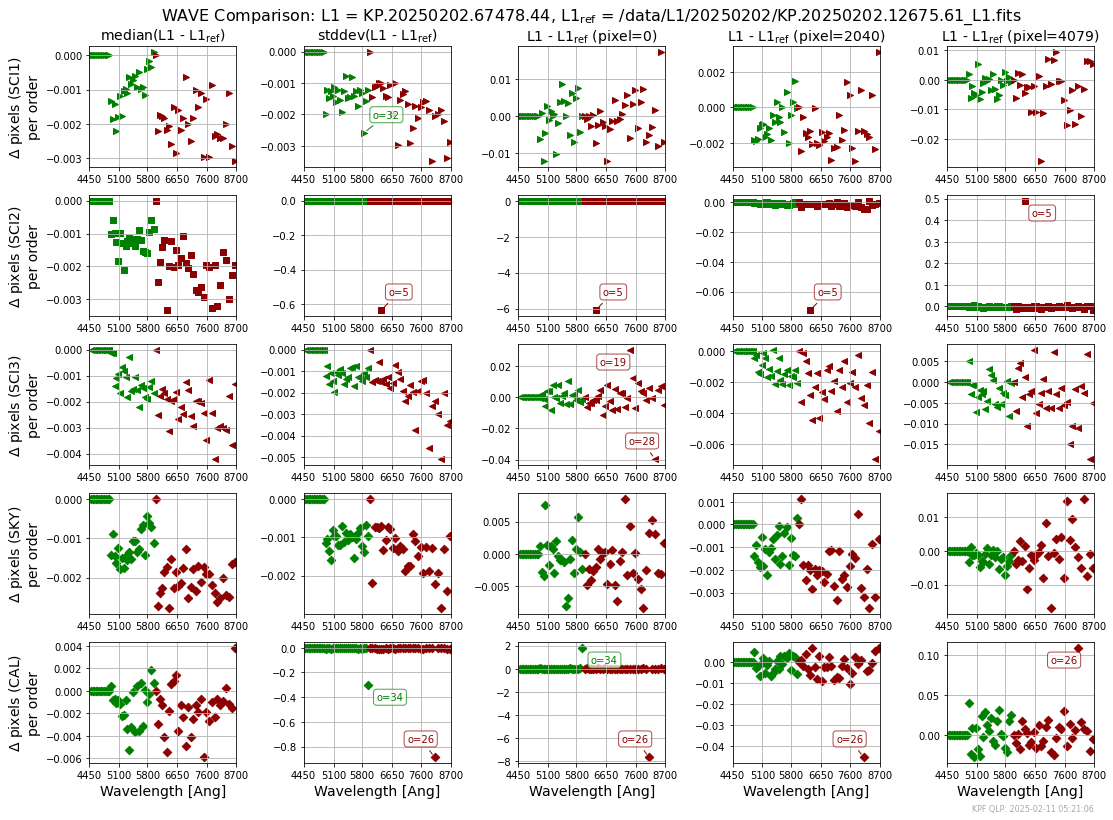

In [6]:
myL1.plot_L1_wave_comparison(reference_file=get_filename(ObsID_ref1, level='L1', fullpath=True), label_n_outliers=3, show_plot=True)

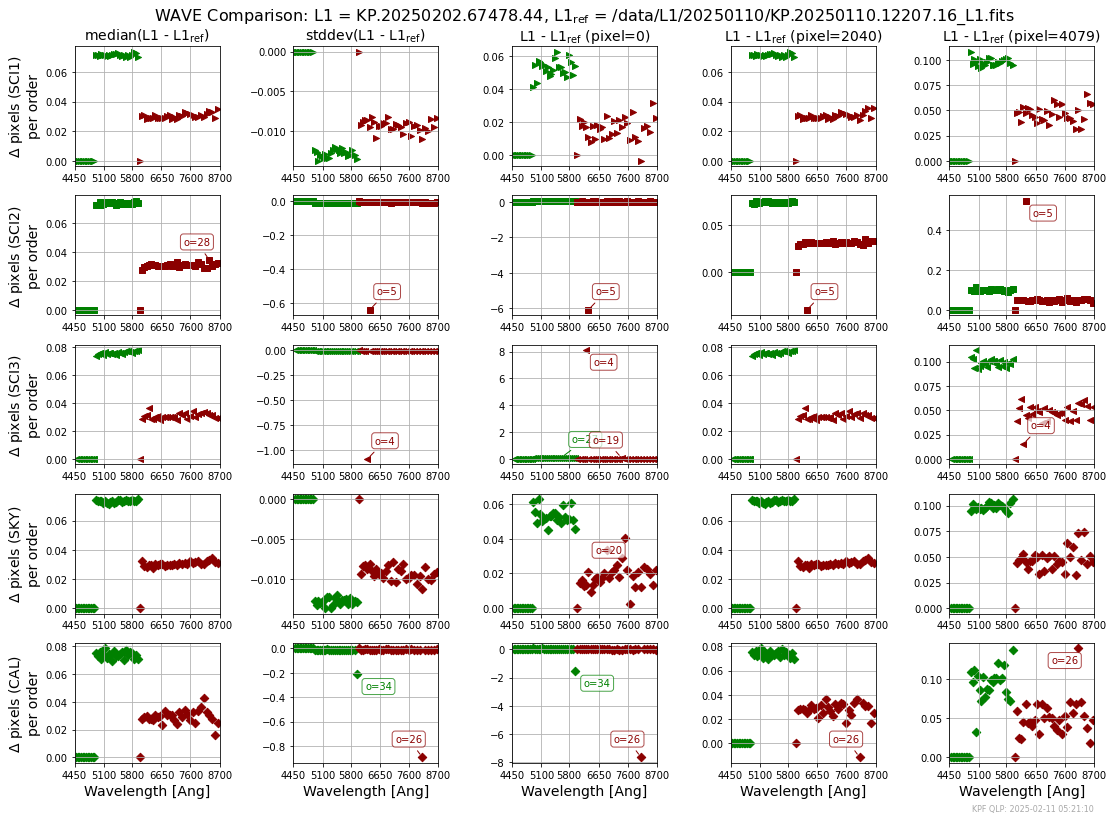

In [7]:
myL1.plot_L1_wave_comparison(reference_file=get_filename(ObsID_ref2, level='L1', fullpath=True), label_n_outliers=3, show_plot=True)